In [30]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier


In [31]:
X_train = pd.read_csv('train.csv')
X_val = pd.read_csv('val.csv')
X_test = pd.read_csv('test.csv')

X_train.drop(index=X_train[X_train['text'].isna()].index, inplace=True)
X_val.drop(index=X_val[X_val['text'].isna()].index, inplace=True)
X_test.drop(index=X_test[X_test['text'].isna()].index, inplace=True)

y_train = X_train.target
y_val = X_val.target
y_test = X_test.target

In [32]:
my_stop_words = ['wa', 'would', 'ha', 'one', 'get']
tfidfvectorizer = TfidfVectorizer(min_df = 0.001, ngram_range=(1, 2), stop_words=my_stop_words)
tfidf_train = tfidfvectorizer.fit_transform(X_train.text)
tfidf_val = tfidfvectorizer.transform(X_val.text)
tfidf_test = tfidfvectorizer.transform(X_test.text)

In [33]:
word2idx = tfidfvectorizer.vocabulary_
idx2word = [""] * len(word2idx)

for word in word2idx:
    idx2word[word2idx[word]] = word
idx2word = np.array(idx2word, dtype='object')

In [56]:
grid = {
    'max_depth': [5, 10, 50, 100, 200, 300, 350, 360, 370, 375, 400, 450, 500, 550, 600],
    'min_samples_leaf': [1, 3, 5, 7],
    'max_features': ['sqrt', 'log2'],
    'class_weight': [None, 'balanced']
}

In [57]:
def binarize_target(target, thr):
    return (target > thr).astype(int)


def run_grid_search(est, param_grid, scoring, x_train, y_train, thr):
    y_train_bin = binarize_target(y_train, thr)
    model = GridSearchCV(estimator=est, param_grid=param_grid, scoring=scoring, cv=3, verbose=3)
    model.fit(x_train, y_train_bin)
    return model

def evaluate(model, tfidf_x, y_bin):
    return roc_auc_score(y_bin, model.predict_proba(tfidf_x)[:,1])

In [58]:
tree05 = run_grid_search(
    est=DecisionTreeClassifier(random_state = 42), 
    param_grid=grid,
    scoring='roc_auc',
    x_train=tfidf_train,
    y_train=y_train,
    thr=0.5
)

Fitting 3 folds for each of 240 candidates, totalling 720 fits
[CV 1/3] END class_weight=None, max_depth=5, max_features=sqrt, min_samples_leaf=1;, score=0.522 total time=   0.0s
[CV 2/3] END class_weight=None, max_depth=5, max_features=sqrt, min_samples_leaf=1;, score=0.520 total time=   0.0s
[CV 3/3] END class_weight=None, max_depth=5, max_features=sqrt, min_samples_leaf=1;, score=0.524 total time=   0.0s
[CV 1/3] END class_weight=None, max_depth=5, max_features=sqrt, min_samples_leaf=3;, score=0.522 total time=   0.0s
[CV 2/3] END class_weight=None, max_depth=5, max_features=sqrt, min_samples_leaf=3;, score=0.520 total time=   0.0s
[CV 3/3] END class_weight=None, max_depth=5, max_features=sqrt, min_samples_leaf=3;, score=0.524 total time=   0.0s
[CV 1/3] END class_weight=None, max_depth=5, max_features=sqrt, min_samples_leaf=5;, score=0.522 total time=   0.0s
[CV 2/3] END class_weight=None, max_depth=5, max_features=sqrt, min_samples_leaf=5;, score=0.520 total time=   0.0s
[CV 3/3] 

In [59]:
tree05.best_params_

{'class_weight': 'balanced',
 'max_depth': 370,
 'max_features': 'sqrt',
 'min_samples_leaf': 7}

In [60]:
tree04 = run_grid_search(
    est=DecisionTreeClassifier(random_state = 42), 
    param_grid=grid,
    scoring='roc_auc',
    x_train=tfidf_train,
    y_train=y_train,
    thr=0.4
)

Fitting 3 folds for each of 240 candidates, totalling 720 fits
[CV 1/3] END class_weight=None, max_depth=5, max_features=sqrt, min_samples_leaf=1;, score=0.522 total time=   0.0s
[CV 2/3] END class_weight=None, max_depth=5, max_features=sqrt, min_samples_leaf=1;, score=0.520 total time=   0.0s
[CV 3/3] END class_weight=None, max_depth=5, max_features=sqrt, min_samples_leaf=1;, score=0.524 total time=   0.0s
[CV 1/3] END class_weight=None, max_depth=5, max_features=sqrt, min_samples_leaf=3;, score=0.522 total time=   0.0s
[CV 2/3] END class_weight=None, max_depth=5, max_features=sqrt, min_samples_leaf=3;, score=0.520 total time=   0.0s
[CV 3/3] END class_weight=None, max_depth=5, max_features=sqrt, min_samples_leaf=3;, score=0.524 total time=   0.0s
[CV 1/3] END class_weight=None, max_depth=5, max_features=sqrt, min_samples_leaf=5;, score=0.522 total time=   0.0s
[CV 2/3] END class_weight=None, max_depth=5, max_features=sqrt, min_samples_leaf=5;, score=0.520 total time=   0.0s
[CV 3/3] 

In [61]:
tree04.best_params_

{'class_weight': 'balanced',
 'max_depth': 370,
 'max_features': 'sqrt',
 'min_samples_leaf': 7}

In [62]:
tree06 = run_grid_search(
    est=DecisionTreeClassifier(random_state = 42), 
    param_grid=grid,
    scoring='roc_auc',
    x_train=tfidf_train,
    y_train=y_train,
    thr=0.6
)

Fitting 3 folds for each of 240 candidates, totalling 720 fits
[CV 1/3] END class_weight=None, max_depth=5, max_features=sqrt, min_samples_leaf=1;, score=0.518 total time=   0.0s
[CV 2/3] END class_weight=None, max_depth=5, max_features=sqrt, min_samples_leaf=1;, score=0.514 total time=   0.0s
[CV 3/3] END class_weight=None, max_depth=5, max_features=sqrt, min_samples_leaf=1;, score=0.517 total time=   0.0s
[CV 1/3] END class_weight=None, max_depth=5, max_features=sqrt, min_samples_leaf=3;, score=0.519 total time=   0.0s
[CV 2/3] END class_weight=None, max_depth=5, max_features=sqrt, min_samples_leaf=3;, score=0.514 total time=   0.0s
[CV 3/3] END class_weight=None, max_depth=5, max_features=sqrt, min_samples_leaf=3;, score=0.518 total time=   0.0s
[CV 1/3] END class_weight=None, max_depth=5, max_features=sqrt, min_samples_leaf=5;, score=0.519 total time=   0.0s
[CV 2/3] END class_weight=None, max_depth=5, max_features=sqrt, min_samples_leaf=5;, score=0.515 total time=   0.0s
[CV 3/3] 

In [63]:
tree06.best_params_

{'class_weight': None,
 'max_depth': 370,
 'max_features': 'sqrt',
 'min_samples_leaf': 7}

In [64]:
print("roc-auc on validation with 0.4 thr {:.4f}".format(round(evaluate(tree04, tfidf_val, binarize_target(y_val, 0.4)), 4)))
print("roc-auc on validation with 0.5 thr {:.4f}".format(round(evaluate(tree05, tfidf_val, binarize_target(y_val, 0.5)), 4)))
print("roc-auc on validation with 0.6 thr {:.4f}".format(round(evaluate(tree06, tfidf_val, binarize_target(y_val, 0.6)), 4)))

roc-auc on validation with 0.4 thr 0.8505
roc-auc on validation with 0.5 thr 0.8524
roc-auc on validation with 0.6 thr 0.7896


Результаты при порогах 0.4 и 0.5 очень схожи, на 0.002 значение лучше при 0.5

In [69]:
val_features_id = np.argsort(tree05.best_estimator_.feature_importances_)[-20:][::-1]
importance = tree05.best_estimator_.feature_importances_[val_features_id]
top_words = idx2word[val_features_id]

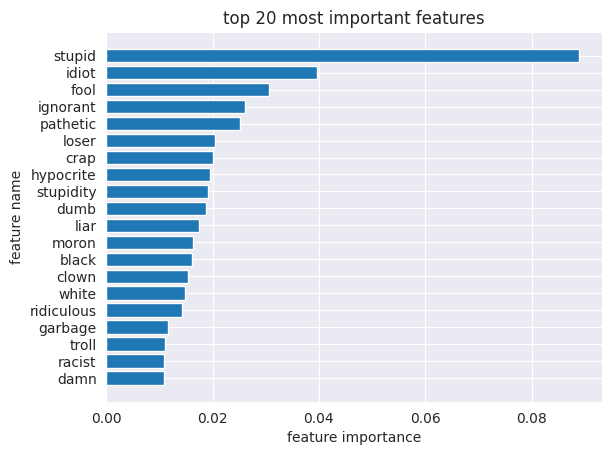

In [70]:
plt.barh(top_words[::-1], importance[::-1])
plt.xlabel('feature importance')
plt.ylabel('feature name')
plt.title('top 20 most important features')
plt.show()

In [16]:
gridlog = {
    'penalty': ['l1', 'l2'], 
    'C': np.logspace(-3,3,7), 

}

In [17]:
def binarize_target(target, thr):
    return (target > thr).astype(int)


def run_grid_search(est, param_grid, scoring, x_train, y_train, thr):
    y_train_bin = binarize_target(y_train, thr)
    model = GridSearchCV(estimator=est, param_grid=param_grid, scoring=scoring, cv=3, verbose=3)
    model.fit(x_train, y_train_bin)
    return model

def evaluate(model, tfidf_x, y_bin):
    return roc_auc_score(y_bin, model.predict_proba(tfidf_x)[:,1])

In [18]:
logreg04 = run_grid_search(
    est= LogisticRegression(), 
    param_grid=gridlog,
    scoring='roc_auc',
    x_train=tfidf_train,
    y_train=y_train,
    thr=0.4
)

Fitting 3 folds for each of 14 candidates, totalling 42 fits
[CV 1/3] END .................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 2/3] END .................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 3/3] END .................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 1/3] END ...............C=0.001, penalty=l2;, score=0.854 total time=   0.0s
[CV 2/3] END ...............C=0.001, penalty=l2;, score=0.857 total time=   0.0s
[CV 3/3] END ...............C=0.001, penalty=l2;, score=0.857 total time=   0.0s
[CV 1/3] END ..................C=0.01, penalty=l1;, score=nan total time=   0.0s
[CV 2/3] END ..................C=0.01, penalty=l1;, score=nan total time=   0.0s
[CV 3/3] END ..................C=0.01, penalty=l1;, score=nan total time=   0.0s
[CV 1/3] END ................C=0.01, penalty=l2;, score=0.863 total time=   0.0s
[CV 2/3] END ................C=0.01, penalty=l2;, score=0.867 total time=   0.1s
[CV 3/3] END ................C=0.01, penalty=l2;

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/3] END ................C=10.0, penalty=l2;, score=0.927 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/3] END ................C=10.0, penalty=l2;, score=0.929 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/3] END ................C=10.0, penalty=l2;, score=0.928 total time=   0.3s
[CV 1/3] END .................C=100.0, penalty=l1;, score=nan total time=   0.0s
[CV 2/3] END .................C=100.0, penalty=l1;, score=nan total time=   0.0s
[CV 3/3] END .................C=100.0, penalty=l1;, score=nan total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/3] END ...............C=100.0, penalty=l2;, score=0.920 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/3] END ...............C=100.0, penalty=l2;, score=0.923 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/3] END ...............C=100.0, penalty=l2;, score=0.919 total time=   0.3s
[CV 1/3] END ................C=1000.0, penalty=l1;, score=nan total time=   0.0s
[CV 2/3] END ................C=1000.0, penalty=l1;, score=nan total time=   0.0s
[CV 3/3] END ................C=1000.0, penalty=l1;, score=nan total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/3] END ..............C=1000.0, penalty=l2;, score=0.916 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/3] END ..............C=1000.0, penalty=l2;, score=0.918 total time=   0.3s
[CV 3/3] END ..............C=1000.0, penalty=l2;, score=0.916 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
21 fits failed out of a total of 42.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
21 fits failed with the following error:
Traceba

In [19]:
logreg04.best_params_

{'C': 1.0, 'penalty': 'l2'}

In [20]:
logreg05 = run_grid_search(
    est= LogisticRegression(), 
    param_grid=gridlog,
    scoring='roc_auc',
    x_train=tfidf_train,
    y_train=y_train,
    thr=0.5
)

Fitting 3 folds for each of 14 candidates, totalling 42 fits
[CV 1/3] END .................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 2/3] END .................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 3/3] END .................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 1/3] END ...............C=0.001, penalty=l2;, score=0.854 total time=   0.0s
[CV 2/3] END ...............C=0.001, penalty=l2;, score=0.856 total time=   0.0s
[CV 3/3] END ...............C=0.001, penalty=l2;, score=0.856 total time=   0.0s
[CV 1/3] END ..................C=0.01, penalty=l1;, score=nan total time=   0.0s
[CV 2/3] END ..................C=0.01, penalty=l1;, score=nan total time=   0.0s
[CV 3/3] END ..................C=0.01, penalty=l1;, score=nan total time=   0.0s
[CV 1/3] END ................C=0.01, penalty=l2;, score=0.863 total time=   0.0s
[CV 2/3] END ................C=0.01, penalty=l2;, score=0.866 total time=   0.0s
[CV 3/3] END ................C=0.01, penalty=l2;

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/3] END ................C=10.0, penalty=l2;, score=0.926 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/3] END ................C=10.0, penalty=l2;, score=0.928 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/3] END ................C=10.0, penalty=l2;, score=0.926 total time=   0.3s
[CV 1/3] END .................C=100.0, penalty=l1;, score=nan total time=   0.0s
[CV 2/3] END .................C=100.0, penalty=l1;, score=nan total time=   0.0s
[CV 3/3] END .................C=100.0, penalty=l1;, score=nan total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/3] END ...............C=100.0, penalty=l2;, score=0.918 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/3] END ...............C=100.0, penalty=l2;, score=0.920 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/3] END ...............C=100.0, penalty=l2;, score=0.918 total time=   0.4s
[CV 1/3] END ................C=1000.0, penalty=l1;, score=nan total time=   0.0s
[CV 2/3] END ................C=1000.0, penalty=l1;, score=nan total time=   0.0s
[CV 3/3] END ................C=1000.0, penalty=l1;, score=nan total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/3] END ..............C=1000.0, penalty=l2;, score=0.914 total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/3] END ..............C=1000.0, penalty=l2;, score=0.919 total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
21 fits failed out of a total of 42.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
21 fits failed with the following error:
Traceba

[CV 3/3] END ..............C=1000.0, penalty=l2;, score=0.913 total time=   0.4s


In [21]:
logreg05.best_params_

{'C': 1.0, 'penalty': 'l2'}

In [22]:
logreg06 = run_grid_search(
    est= LogisticRegression(), 
    param_grid=gridlog,
    scoring='roc_auc',
    x_train=tfidf_train,
    y_train=y_train,
    thr=0.6
)

Fitting 3 folds for each of 14 candidates, totalling 42 fits
[CV 1/3] END .................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 2/3] END .................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 3/3] END .................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 1/3] END ...............C=0.001, penalty=l2;, score=0.819 total time=   0.0s
[CV 2/3] END ...............C=0.001, penalty=l2;, score=0.817 total time=   0.0s
[CV 3/3] END ...............C=0.001, penalty=l2;, score=0.820 total time=   0.0s
[CV 1/3] END ..................C=0.01, penalty=l1;, score=nan total time=   0.0s
[CV 2/3] END ..................C=0.01, penalty=l1;, score=nan total time=   0.0s
[CV 3/3] END ..................C=0.01, penalty=l1;, score=nan total time=   0.0s
[CV 1/3] END ................C=0.01, penalty=l2;, score=0.825 total time=   0.0s
[CV 2/3] END ................C=0.01, penalty=l2;, score=0.822 total time=   0.1s
[CV 3/3] END ................C=0.01, penalty=l2;

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/3] END .................C=1.0, penalty=l2;, score=0.857 total time=   0.3s
[CV 3/3] END .................C=1.0, penalty=l2;, score=0.858 total time=   0.3s
[CV 1/3] END ..................C=10.0, penalty=l1;, score=nan total time=   0.0s
[CV 2/3] END ..................C=10.0, penalty=l1;, score=nan total time=   0.0s
[CV 3/3] END ..................C=10.0, penalty=l1;, score=nan total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/3] END ................C=10.0, penalty=l2;, score=0.841 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/3] END ................C=10.0, penalty=l2;, score=0.839 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/3] END ................C=10.0, penalty=l2;, score=0.838 total time=   0.3s
[CV 1/3] END .................C=100.0, penalty=l1;, score=nan total time=   0.0s
[CV 2/3] END .................C=100.0, penalty=l1;, score=nan total time=   0.0s
[CV 3/3] END .................C=100.0, penalty=l1;, score=nan total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/3] END ...............C=100.0, penalty=l2;, score=0.825 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/3] END ...............C=100.0, penalty=l2;, score=0.824 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/3] END ...............C=100.0, penalty=l2;, score=0.822 total time=   0.3s
[CV 1/3] END ................C=1000.0, penalty=l1;, score=nan total time=   0.0s
[CV 2/3] END ................C=1000.0, penalty=l1;, score=nan total time=   0.0s
[CV 3/3] END ................C=1000.0, penalty=l1;, score=nan total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/3] END ..............C=1000.0, penalty=l2;, score=0.822 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/3] END ..............C=1000.0, penalty=l2;, score=0.822 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
21 fits failed out of a total of 42.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
21 fits failed with the following error:
Traceba

[CV 3/3] END ..............C=1000.0, penalty=l2;, score=0.819 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
logreg06.best_params_

{'C': 1.0, 'penalty': 'l2'}

In [24]:
print("roc-auc on validation with 0.4 thr {:.4f}".format(round(evaluate(logreg04, tfidf_val, binarize_target(y_val, 0.4)), 4)))
print("roc-auc on validation with 0.5 thr {:.4f}".format(round(evaluate(logreg05, tfidf_val, binarize_target(y_val, 0.5)), 4)))
print("roc-auc on validation with 0.6 thr {:.4f}".format(round(evaluate(logreg06, tfidf_val, binarize_target(y_val, 0.6)), 4)))

roc-auc on validation with 0.4 thr 0.9317
roc-auc on validation with 0.5 thr 0.9306
roc-auc on validation with 0.6 thr 0.8686


Результаты при порогах 0.4 и 0.5 схожи, на 0.001 значение лучше при 0.4

In [25]:
thr = 0.4
y_train_bin = binarize_target(y_train, thr)
y_val_bin = binarize_target(y_val, thr)
y_test_bin = binarize_target(y_test, thr)

In [26]:
%%timeit -n 3 -r 5
best_rfc = DecisionTreeClassifier(max_depth = 200, class_weight='balanced', max_features = 'sqrt',
 min_samples_leaf= 7).fit(tfidf_train, y_train_bin)

203 ms ± 7.46 ms per loop (mean ± std. dev. of 5 runs, 3 loops each)


In [27]:
best_rfc = DecisionTreeClassifier(max_depth = 200, class_weight='balanced', max_features = 'sqrt',
 min_samples_leaf= 7).fit(tfidf_train, y_train_bin)

In [28]:
%%timeit 
best_rfc.predict_proba(tfidf_train)

14.6 ms ± 895 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Наилучший результат показала логистическая регрессия, roc-auc равен 0,9317